Dataset Description -
Datasets with text fragments from astrophysics papers, provided by the NASA Astrophysical Data System with manually tagged astronomical facilities and other entities of interest (e.g., celestial objects).
Datasets are in JSON Lines format (each line is a json dictionary).
The datasets are formatted similarly to the CONLL2003 format. Each token is associated with an NER tag. The tags follow the "B-" and "I-" convention from the IOB2 syntax

Each entry consists of a dictionary with the following keys:

"unique_id": a unique identifier for this data sample. Must be included in the predictions.
"tokens": the list of tokens (strings) that form the text of this sample. Must be included in the predictions.
"ner_tags": the list of NER tags (in IOB2 format)
The following keys are not strictly needed by the participants:

"ner_ids": the pre-computed list of ids corresponding ner_tags, as given by the dictionary in ner_tags.json
"label_studio_id", "section", "bibcode": references for internal NASA/ADS use.

Source - https://huggingface.co/datasets/fgrezes/WIESP2022-NER#dataset-description

In [60]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

# credits -> https://stackoverflow.com/posts/17303428/revisions
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [133]:
df = pd.read_parquet('https://github.com/BhardwajAnshul/NER-Project/blob/main/data/WIESP2022-NER-TRAINING.parquet?raw=true')

In [82]:
len(df)

573132

In [3]:
df

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id
0,2019MNRAS.486.5558S,487,62,O,fulltext,Whilst,fulltext_487_2019MNRAS.486.5558S
1,2019MNRAS.486.5558S,487,62,O,fulltext,a,fulltext_487_2019MNRAS.486.5558S
2,2019MNRAS.486.5558S,487,62,O,fulltext,reasonable,fulltext_487_2019MNRAS.486.5558S
3,2019MNRAS.486.5558S,487,62,O,fulltext,harmonic,fulltext_487_2019MNRAS.486.5558S
4,2019MNRAS.486.5558S,487,62,O,fulltext,fit,fulltext_487_2019MNRAS.486.5558S
...,...,...,...,...,...,...,...
573127,2016A&A...591A..74D,1746,62,O,fulltext,level,fulltext_1746_2016A&A...591A..74D
573128,2016A&A...591A..74D,1746,62,O,fulltext,(RV,fulltext_1746_2016A&A...591A..74D
573129,2016A&A...591A..74D,1746,62,O,fulltext,intervals,fulltext_1746_2016A&A...591A..74D
573130,2016A&A...591A..74D,1746,62,O,fulltext,48,fulltext_1746_2016A&A...591A..74D


In [145]:
df.groupby('tokens').agg(count=('tokens', 'count')).sort_values('count', ascending=False).reset_index().to_csv('counts.csv')

In [33]:
print(f"{'Column Name':<20} {'Number of Unique Values'}")
for col in df.columns:
    print(f'{col:<20} {df[col].nunique()}')

Column Name          Number of Unique Values
bibcode              1723
label_studio_id      1332
ner_ids              63
ner_tags             63
section              2
tokens               48991
unique_id            1753


In [29]:
# Unique entries in ner_ids
pprint(df.ner_ids.unique())

array([62, 15, 17,  4, 35, 27, 30, 61, 18, 49, 24, 55, 12, 43, 22, 21, 52,
       11, 42, 13, 44, 53, 16, 47, 10, 41, 29,  5, 36,  1, 32,  8, 39,  2,
       33, 28, 59, 25, 19, 50,  6, 37, 56, 58, 20,  3, 34,  0, 31, 23, 51,
        7, 38, 26, 14, 45, 48, 60, 57, 54, 46,  9, 40])


In [30]:
# Unique entries in ner_tags
pprint(df.ner_tags.unique())

array(['O', 'B-Instrument', 'B-Mission', 'B-Citation', 'I-Citation',
       'B-Telescope', 'B-Wavelength', 'I-Wavelength', 'B-Model',
       'I-Model', 'B-Software', 'I-Software', 'B-Formula', 'I-Formula',
       'B-Person', 'B-Organization', 'I-Organization', 'B-Fellowship',
       'I-Fellowship', 'B-Grant', 'I-Grant', 'I-Person', 'B-Location',
       'I-Location', 'B-Event', 'I-Event', 'B-URL', 'B-Collaboration',
       'I-Collaboration', 'B-CelestialObject', 'I-CelestialObject',
       'B-Dataset', 'I-Dataset', 'B-CelestialObjectRegion',
       'I-CelestialObjectRegion', 'B-TextGarbage', 'I-TextGarbage',
       'B-Survey', 'B-ObservationalTechniques',
       'I-ObservationalTechniques', 'B-ComputingFacility',
       'I-ComputingFacility', 'I-Survey', 'I-Telescope', 'B-Observatory',
       'B-CelestialRegion', 'I-CelestialRegion', 'B-Archive', 'I-Archive',
       'B-Proposal', 'I-Observatory', 'B-Database', 'I-Database', 'B-Tag',
       'B-Identifier', 'I-Identifier', 'I-Mission', 'I

In [81]:
ner_count_df = df['ner_tags'].value_counts().reset_index()
ner_count_df

,index,ner_tags
0,O,472307
1,I-Citation,18402
2,I-Organization,14211
3,I-Formula,8433
4,B-Organization,7448
...,...,...
58,B-Event,45
59,I-Identifier,31
60,I-Mission,27
61,I-EntityOfFutureInterest,16


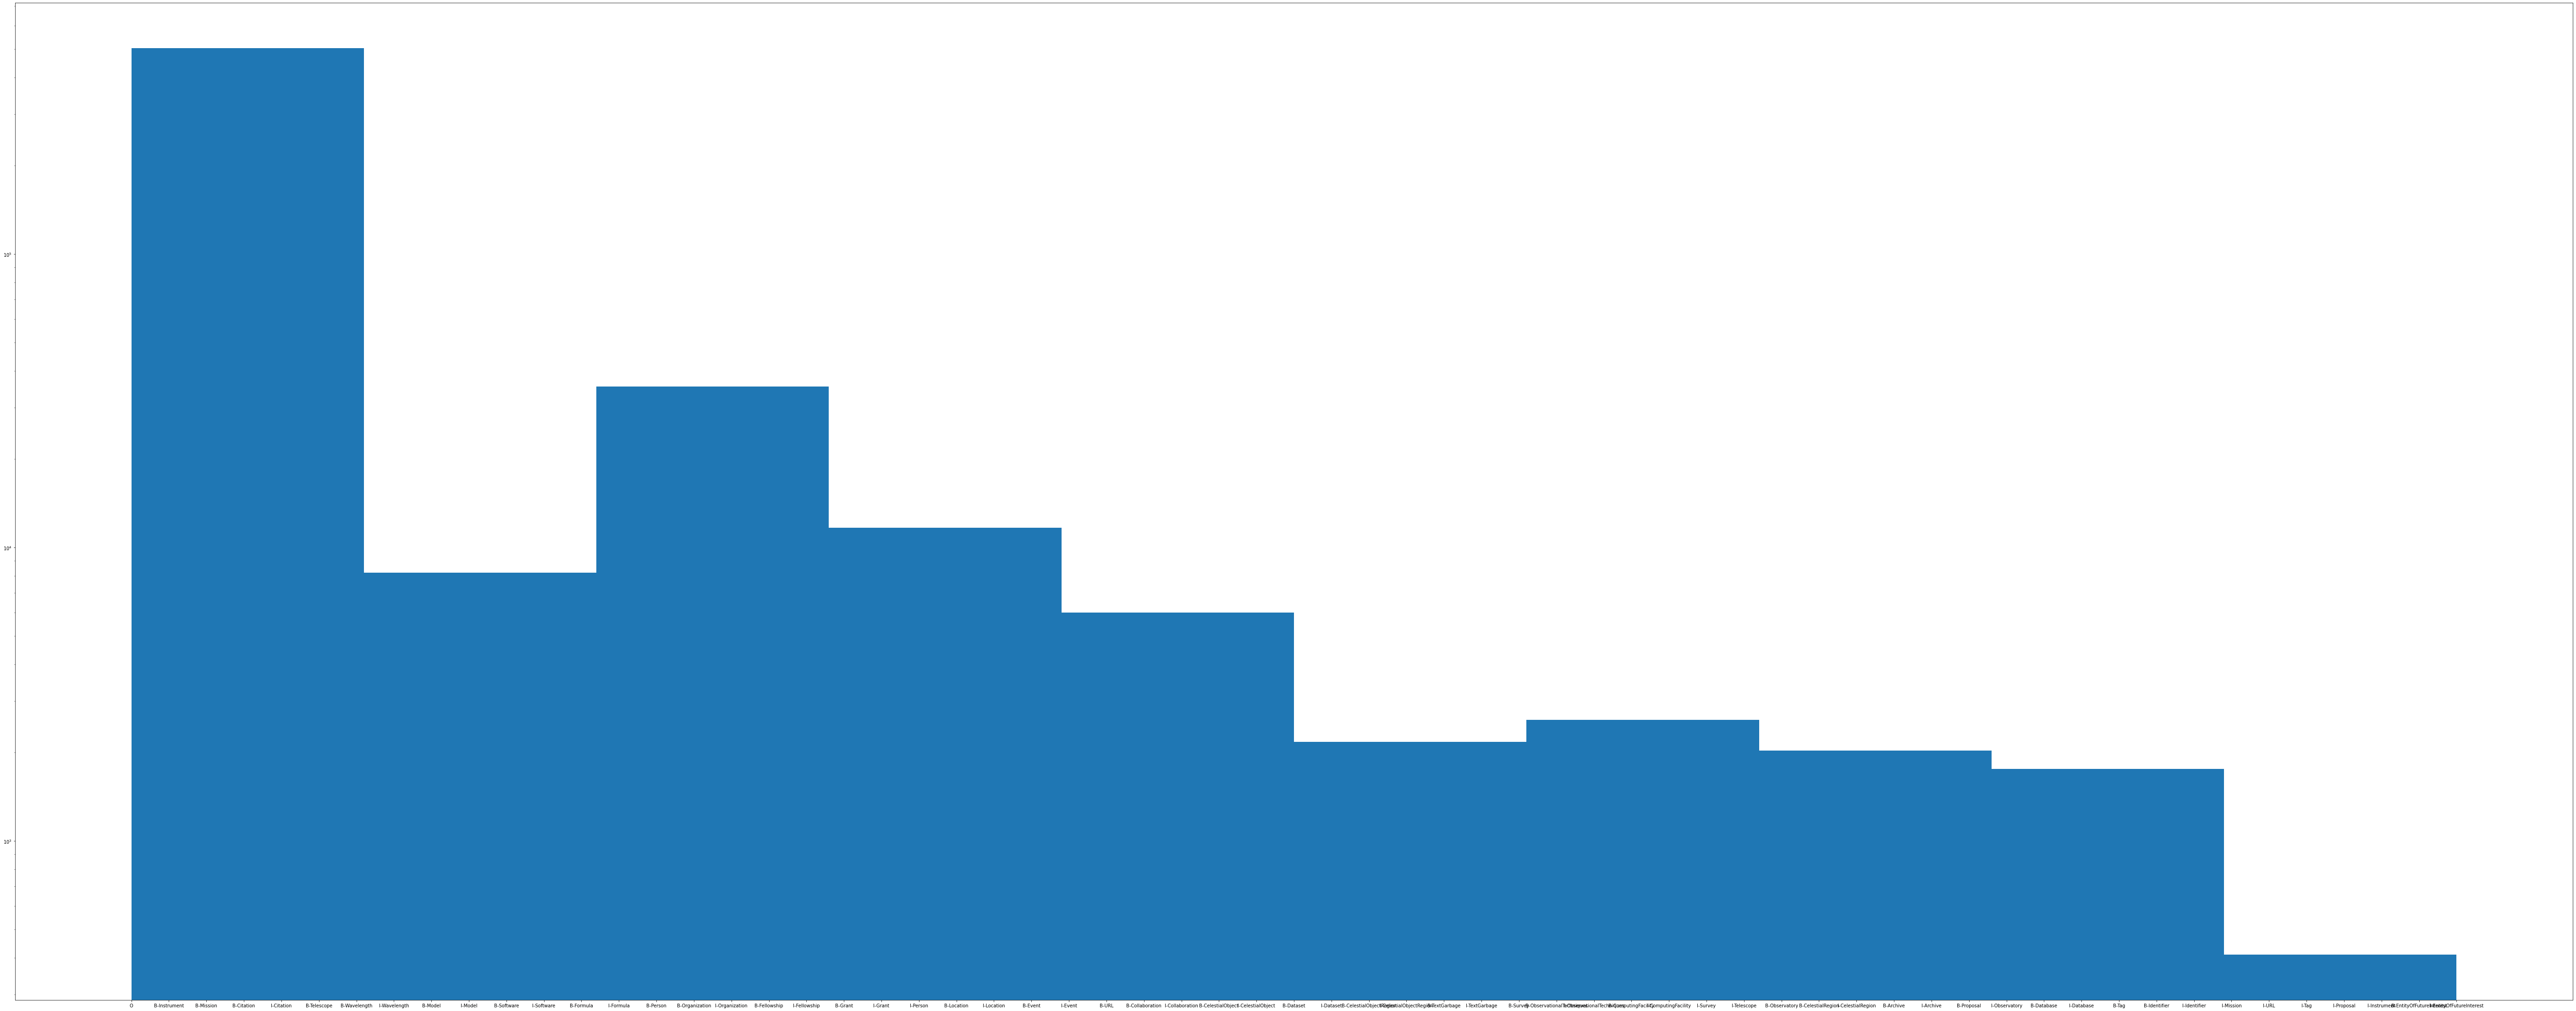

In [73]:
# Explore the tags

plt.figure(figsize=(100,40))
plt.hist(df.ner_tags, log=True)
plt.show()

In [80]:
pprint(list(ner_count_df.ner_tags))

[472307,
 18402,
 14211,
 8433,
 7448,
 6360,
 4080,
 3916,
 3478,
 3384,
 2940,
 2206,
 2088,
 1800,
 1691,
 1583,
 1573,
 1404,
 1244,
 1035,
 1017,
 1015,
 885,
 873,
 809,
 714,
 607,
 598,
 573,
 472,
 467,
 466,
 411,
 399,
 368,
 328,
 306,
 294,
 265,
 259,
 256,
 240,
 223,
 192,
 176,
 158,
 140,
 124,
 112,
 110,
 100,
 100,
 74,
 66,
 61,
 54,
 54,
 52,
 45,
 31,
 27,
 16,
 12]


In [35]:
# Unique entries in section
pprint(df.section.unique())

array(['fulltext', 'acknowledgments'], dtype=object)


In [40]:
len(df.groupby(['ner_tags', 'section']))

115

In [48]:
set(df.query("section=='fulltext'").ner_tags.unique()) - set(df.query("section!='fulltext'").ner_tags.unique())

{'B-CelestialObjectRegion',
 'B-EntityOfFutureInterest',
 'B-Formula',
 'B-Tag',
 'I-CelestialObjectRegion',
 'I-EntityOfFutureInterest',
 'I-Formula',
 'I-ObservationalTechniques',
 'I-Tag'}

In [49]:
set(df.query("section!='fulltext'").ner_tags.unique()) - set(df.query("section=='fulltext'").ner_tags.unique())

{'B-Fellowship', 'I-Fellowship'}

In [54]:
df.groupby('unique_id').agg(word_count = ('unique_id', 'count')).sort_values('word_count')

,word_count
unique_id,
acknowledgments_1412_2017A&A...608A..57V,7
acknowledgments_1102_2015MNRAS.446.1347M,8
acknowledgments_1225_2018MNRAS.478L..95K,11
acknowledgments_1025_2016MNRAS.456.1955D,12
acknowledgments_1039_2016MNRAS.457.4330Y,13
...,...
acknowledgments_717_2016ApJ...826..144S,660
acknowledgments_96_2018ApJ...859..101S,666
acknowledgments_611_2018A&A...616A..69B,677


In [55]:
df.groupby('unique_id').agg(word_count = ('unique_id', 'count')).sort_values('word_count').head(20)

,word_count
unique_id,
acknowledgments_1412_2017A&A...608A..57V,7
acknowledgments_1102_2015MNRAS.446.1347M,8
acknowledgments_1225_2018MNRAS.478L..95K,11
acknowledgments_1025_2016MNRAS.456.1955D,12
acknowledgments_1039_2016MNRAS.457.4330Y,13
...,...
acknowledgments_1018_2018MNRAS.478..342B,19
acknowledgments_988_2016MNRAS.461.3948P,19
acknowledgments_492_2015ApJ...802...16Y,19


In [87]:
temp = df.groupby('unique_id').agg(word_count = ('unique_id', 'count')).sort_values('word_count')

In [84]:
temp

,word_count
unique_id,
acknowledgments_1412_2017A&A...608A..57V,7
acknowledgments_1102_2015MNRAS.446.1347M,8
acknowledgments_1225_2018MNRAS.478L..95K,11
acknowledgments_1025_2016MNRAS.456.1955D,12
acknowledgments_1039_2016MNRAS.457.4330Y,13
...,...
acknowledgments_717_2016ApJ...826..144S,660
acknowledgments_96_2018ApJ...859..101S,666
acknowledgments_611_2018A&A...616A..69B,677


In [88]:
temp.describe()

,word_count
count,1753.000000
mean,326.943525
std,209.222148
min,7.000000
25%,98.000000
50%,470.000000
75%,518.000000
max,795.000000


In [132]:
df

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id,sentence_id,sentence_id2
0,2019MNRAS.486.5558S,487,62,O,fulltext,Whilst,fulltext_487_2019MNRAS.486.5558S,0,0
1,2019MNRAS.486.5558S,487,62,O,fulltext,a,fulltext_487_2019MNRAS.486.5558S,0,0
2,2019MNRAS.486.5558S,487,62,O,fulltext,reasonable,fulltext_487_2019MNRAS.486.5558S,0,0
3,2019MNRAS.486.5558S,487,62,O,fulltext,harmonic,fulltext_487_2019MNRAS.486.5558S,0,0
4,2019MNRAS.486.5558S,487,62,O,fulltext,fit,fulltext_487_2019MNRAS.486.5558S,0,0
...,...,...,...,...,...,...,...,...,...
573127,2016A&A...591A..74D,1746,62,O,fulltext,level,fulltext_1746_2016A&A...591A..74D,0,2057
573128,2016A&A...591A..74D,1746,62,O,fulltext,(RV,fulltext_1746_2016A&A...591A..74D,0,2057
573129,2016A&A...591A..74D,1746,62,O,fulltext,intervals,fulltext_1746_2016A&A...591A..74D,0,2057
573130,2016A&A...591A..74D,1746,62,O,fulltext,48,fulltext_1746_2016A&A...591A..74D,0,2057


#### Finding Sentences

In [138]:
df['is_stoptoken'] = 0
df['is_stoptoken'][df.tokens == '.'] = 1

/Users/anshul/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [140]:
df['sentence_id'] = df['is_stoptoken'].cumsum()

In [141]:
df

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id,is_stoptoken,sentence_id
0,2019MNRAS.486.5558S,487,62,O,fulltext,Whilst,fulltext_487_2019MNRAS.486.5558S,0,0
1,2019MNRAS.486.5558S,487,62,O,fulltext,a,fulltext_487_2019MNRAS.486.5558S,0,0
2,2019MNRAS.486.5558S,487,62,O,fulltext,reasonable,fulltext_487_2019MNRAS.486.5558S,0,0
3,2019MNRAS.486.5558S,487,62,O,fulltext,harmonic,fulltext_487_2019MNRAS.486.5558S,0,0
4,2019MNRAS.486.5558S,487,62,O,fulltext,fit,fulltext_487_2019MNRAS.486.5558S,0,0
...,...,...,...,...,...,...,...,...,...
573127,2016A&A...591A..74D,1746,62,O,fulltext,level,fulltext_1746_2016A&A...591A..74D,0,2057
573128,2016A&A...591A..74D,1746,62,O,fulltext,(RV,fulltext_1746_2016A&A...591A..74D,0,2057
573129,2016A&A...591A..74D,1746,62,O,fulltext,intervals,fulltext_1746_2016A&A...591A..74D,0,2057
573130,2016A&A...591A..74D,1746,62,O,fulltext,48,fulltext_1746_2016A&A...591A..74D,0,2057


#### Finding length of a sentences

In [146]:
df.groupby('sentence_id').agg(count=('sentence_id', 'count')).describe()

,count
count,2058.000000
mean,278.489796
std,359.095619
min,4.000000
25%,53.250000
50%,139.000000
75%,348.000000
max,2694.000000


In [147]:
len(df)

573132

In [149]:
573132/10000

57.3132

In [172]:
start_tokens = ['The', 'We', 'This', 'In', 'Figure', 'Fig.', 'For', 'Table', 'However,', 
                'As', 'These', 'It', 'To', 'Our', 'ACKNOWLEDGEMENTS', 'If', 'Galactic',
                'Department', 'All', 'Natutal', 'Collaboration', 'From', 'Space', 'Section'
]

In [171]:
sum(df['tokens'] == "Section")

360

In [192]:
i = 0
all = []
for token in df.tokens:
    if token.endswith('.'):
        if '.' in token[:-1]:
            i +=1
            all.append(token)

In [193]:
set(all)

{'#2012.1.00437.S.',
 '#2013.1.00601.S.',
 '(0.001).',
 '(0.6arcsec).',
 '(1.0,0.1).',
 '(1.140035.01).',
 '(10.4%).',
 '(6.4).',
 '(>0.5).',
 '(J.J.',
 '(J.K.).',
 '(J.P.).',
 '(L.M.',
 '(P.A.',
 '(P.J.K).',
 '(P.O.R.',
 '(R.M.-D.',
 '(S.A.A.).',
 '(S.M.).',
 '(cosmosnet.it).',
 '(cschreib.github.io/phypp/).',
 '(e.g.',
 '(i.e.',
 '(sky.esa.int/).',
 '(Á.L.J.).',
 '(∼1.5).',
 ')=3.5.',
 '+46d57m21.19s.',
 '...',
 '.true.',
 '/1.4.',
 '/d.o.f.',
 '0.002.',
 '0.003.',
 '0.004′′).',
 '0.005.',
 '0.01.',
 '0.017.',
 '0.018.',
 '0.01–0.60).',
 '0.02.',
 '0.025.',
 '0.03.',
 '0.039.',
 '0.04.',
 '0.043.',
 '0.046.',
 '0.07.',
 '0.08).',
 '0.1).',
 '0.1.',
 '0.10.3.',
 '0.11.',
 '0.116.',
 '0.12.',
 '0.15).',
 '0.18.',
 '0.19).',
 '0.1–0.2.',
 '0.2%.',
 '0.2.',
 '0.21.',
 '0.24.',
 '0.256.',
 '0.27.',
 '0.29.',
 '0.2].',
 '0.30.',
 '0.31.',
 '0.33%.',
 '0.37).',
 '0.38.',
 '0.3G.',
 '0.4.',
 '0.42).',
 '0.428.',
 '0.43.',
 '0.43].',
 '0.44.',
 '0.450.',
 '0.48.',
 '0.49).',
 '0.49.',
 '0.4–0

In [176]:
i

31382

In [177]:
len(df)

573132

In [178]:
573132/31382

18.263080746924988

In [179]:
j = 0
for token in df.tokens:
    if '.' in token:
        j +=1

In [180]:
j

36223

In [183]:
k = 0
all = []
for token in df.tokens:
    if ('.' in token) and (not token.endswith('.')):
        k +=1
        all.append(token)

In [182]:
k

4841

In [187]:
set(all)

{'2.4',
 '7774.16',
 'http://rms.leeds.ac.uk/cgi-bin/public/RMS_DATABASE.cgi',
 '88.7',
 'AGNs—e.g.,',
 '7775.39',
 '0.979855(5)',
 '0.847',
 'A.17',
 '(i.e.,',
 '0.74',
 '0.98',
 '(5.4',
 '86.24',
 '6.8',
 '0.4kpc',
 'v5.1.1;',
 '1.90',
 '(M.B.,',
 '0.1184,',
 '179.B-2002,',
 '0.47–0.82',
 '0.5]',
 '0.54',
 '13.3,',
 '1.516',
 '11.2/3.3',
 'P.J.K.,',
 '0.92–0.95,',
 'L.P.Y.,',
 'M.Š.)',
 '0.4),',
 'https://doi.org/10.17909/t9-ge0b-jm58',
 '−1.3',
 '0.65',
 '19.93',
 '0.02)',
 '70.C-0008(A)',
 'xlink:href="aa37995-20-eq62.gif"></inline-graphic>',
 '≈0.5',
 'http://szcluster-db.ias.u-psud.fr',
 'B.4',
 '3.0)',
 '(0.99),',
 '6.37)',
 '0.91',
 '20.3',
 '0.16',
 'J.E.L.’s',
 '1547.0-5408,',
 '−1.5',
 'A.32',
 '0.17,',
 '6749.4',
 'xlink:href="apj523559ieqn106.gif"></inline-graphic>',
 '1.16',
 'medium.”',
 'A.33',
 '“rot-ST.”',
 '1.49',
 '0.70',
 '0.117222',
 '0.65′′',
 '1843.1',
 '0.01',
 '(0.000,',
 '0.15',
 '21.5',
 '10.5281/zenodo.11813',
 'C.R.),',
 '(0.95)',
 '(8.5',
 '2.30',
 '1.93-

In [194]:
len(df)

573132